# Face Alignment by Hourglass (84 landmarks)

In [1]:
import tensorflow as tf
import menpo.io as mio
import numpy as np
import matplotlib.pyplot as pt
import networks
from flags import FLAGS

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [2]:
def tf_heatmap_to_lms(heatmap):
    hs = tf.argmax(tf.reduce_max(heatmap, 2), 1)
    ws = tf.argmax(tf.reduce_max(heatmap, 1), 1)
    lms = tf.transpose(tf.to_float(tf.stack([hs, ws])), perm=[1, 2, 0])
    return lms

In [3]:
model_path = '../models/alignment/3D84/model.ckpt-277538'
template = mio.import_pickle('./image/template.pkl.gz')
n_landmarks = 84
FLAGS.n_landmarks = 84
with tf.Graph().as_default() as g:
    images_input = tf.placeholder(tf.float32, shape=(None, None, None, 3), name='input_images')
    net_model = networks.DNFaceMultiView('')
    with tf.variable_scope('net'):
        lms_heatmap_prediction,states = net_model._build_network(images_input, datas=None, is_training=False, n_channels=n_landmarks)
        pts_predictions = tf_heatmap_to_lms(lms_heatmap_prediction)
        variables_to_restore = tf.all_variables()
        saver = tf.train.Saver(variables_to_restore)

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config,graph=g)

saver.restore(sess, model_path)


Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Please use tf.global_variables instead.
INFO:tensorflow:Restoring parameters from ../models/alignment/3D84/model.ckpt-277538


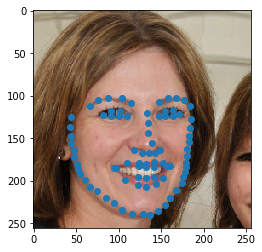

In [4]:
image_path = '00000-generate-images/seed6622.png'
image = mio.import_image(image_path)
image = image.resize([256,256])
input_pixels = image.pixels_with_channels_at_back()
pts_pred = sess.run(
    pts_predictions,
    feed_dict={images_input: np.expand_dims(input_pixels, axis=0)})
pt.imshow(input_pixels)
pt.scatter(pts_pred[0][:,1],pts_pred[0][:,0])